<a href="https://colab.research.google.com/github/ibkarthi/CSK/blob/master/StudentSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
sns.set()

In [ ]:
df = pd.read_csv('student-mat.csv', sep = ';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
df.shape

(395, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [ ]:
df['school'].unique()

array(['GP', 'MS'], dtype=object)

In [ ]:
stud_df = df.copy()

In [ ]:
stud_df.select_dtypes(include = 'object').columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [ ]:
cols = stud_df.select_dtypes(include = 'object').columns
for col in cols:
  print(col, ':', stud_df[col].unique())


school : ['GP' 'MS']
sex : ['F' 'M']
address : ['U' 'R']
famsize : ['GT3' 'LE3']
Pstatus : ['A' 'T']
Mjob : ['at_home' 'health' 'other' 'services' 'teacher']
Fjob : ['teacher' 'other' 'services' 'health' 'at_home']
reason : ['course' 'other' 'home' 'reputation']
guardian : ['mother' 'father' 'other']
schoolsup : ['yes' 'no']
famsup : ['no' 'yes']
paid : ['no' 'yes']
activities : ['no' 'yes']
nursery : ['yes' 'no']
higher : ['yes' 'no']
internet : ['no' 'yes']
romantic : ['no' 'yes']


In [ ]:
stud_df['school'] = stud_df['school'].map({'GP' : 1, 'MS' : 0})

In [ ]:
stud_df['sex'] = stud_df['sex'].map({'M' : 0, 'F' : 1})

In [ ]:
stud_df['address'] = stud_df['address'].map({'U' : 1, 'R' : 0})

In [ ]:
stud_df['famsize'] = stud_df['famsize'].map({'GT3' : 1, 'LE3' : 0})

In [ ]:
stud_df['Pstatus'] = stud_df['Pstatus'].map({'A' : 0, 'T' : 1})

In [ ]:
stud_df['Mjob'] = stud_df['Mjob'].map({'at_home' : 0, 'health' : 4, 'other' : 1, 'services' : 2, 'teacher' : 3})

In [ ]:
stud_df['Fjob'] = stud_df['Fjob'].map({'at_home' : 0, 'health' : 4, 'other' : 1, 'services' : 2, 'teacher' : 3})

In [ ]:
stud_df['reason'] = stud_df['reason'].map({'course' : 1, 'other' : 0, 'home' : 2, 'reputation' : 3})

In [ ]:
stud_df['guardian'] = stud_df['guardian'].map({'mother' : 2, 'father' : 1, 'other' : 0})

In [ ]:
stud_df['schoolsup'] = stud_df['schoolsup'].map({'yes' : 1, 'no' : 0})

In [ ]:
stud_df['famsup'] = stud_df['famsup'].map({'yes' : 1, 'no' : 0})

In [ ]:
stud_df['paid'] = stud_df['paid'].map({'yes' : 1, 'no' : 0})

In [ ]:
stud_df['activities'] = stud_df['activities'].map({'yes' : 1, 'no' : 0})

In [ ]:
stud_df['nursery'] = stud_df['nursery'].map({'yes' : 1, 'no' : 0})

In [ ]:
stud_df['higher'] = stud_df['higher'].map({'yes' : 1, 'no' : 0})

In [ ]:
stud_df['internet'] = stud_df['internet'].map({'yes' : 1, 'no' : 0})

In [ ]:
stud_df['romantic'] = stud_df['romantic'].map({'yes' : 1, 'no' : 0})

In [ ]:
stud_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,1,1,0,4,4,0,3,...,4,3,4,1,1,3,6,5,6,6
1,1,1,17,1,1,1,1,1,0,1,...,5,3,3,1,1,3,4,5,5,6
2,1,1,15,1,0,1,1,1,0,1,...,4,3,2,2,3,3,10,7,8,10
3,1,1,15,1,1,1,4,2,4,2,...,3,2,2,1,1,5,2,15,14,15
4,1,1,16,1,1,1,3,3,1,1,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
stud_df['school'].unique()

array([1, 0])

In [ ]:
stud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int64
 1   sex         395 non-null    int64
 2   age         395 non-null    int64
 3   address     395 non-null    int64
 4   famsize     395 non-null    int64
 5   Pstatus     395 non-null    int64
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    int64
 9   Fjob        395 non-null    int64
 10  reason      395 non-null    int64
 11  guardian    395 non-null    int64
 12  traveltime  395 non-null    int64
 13  studytime   395 non-null    int64
 14  failures    395 non-null    int64
 15  schoolsup   395 non-null    int64
 16  famsup      395 non-null    int64
 17  paid        395 non-null    int64
 18  activities  395 non-null    int64
 19  nursery     395 non-null    int64
 20  higher      395 non-null    int6

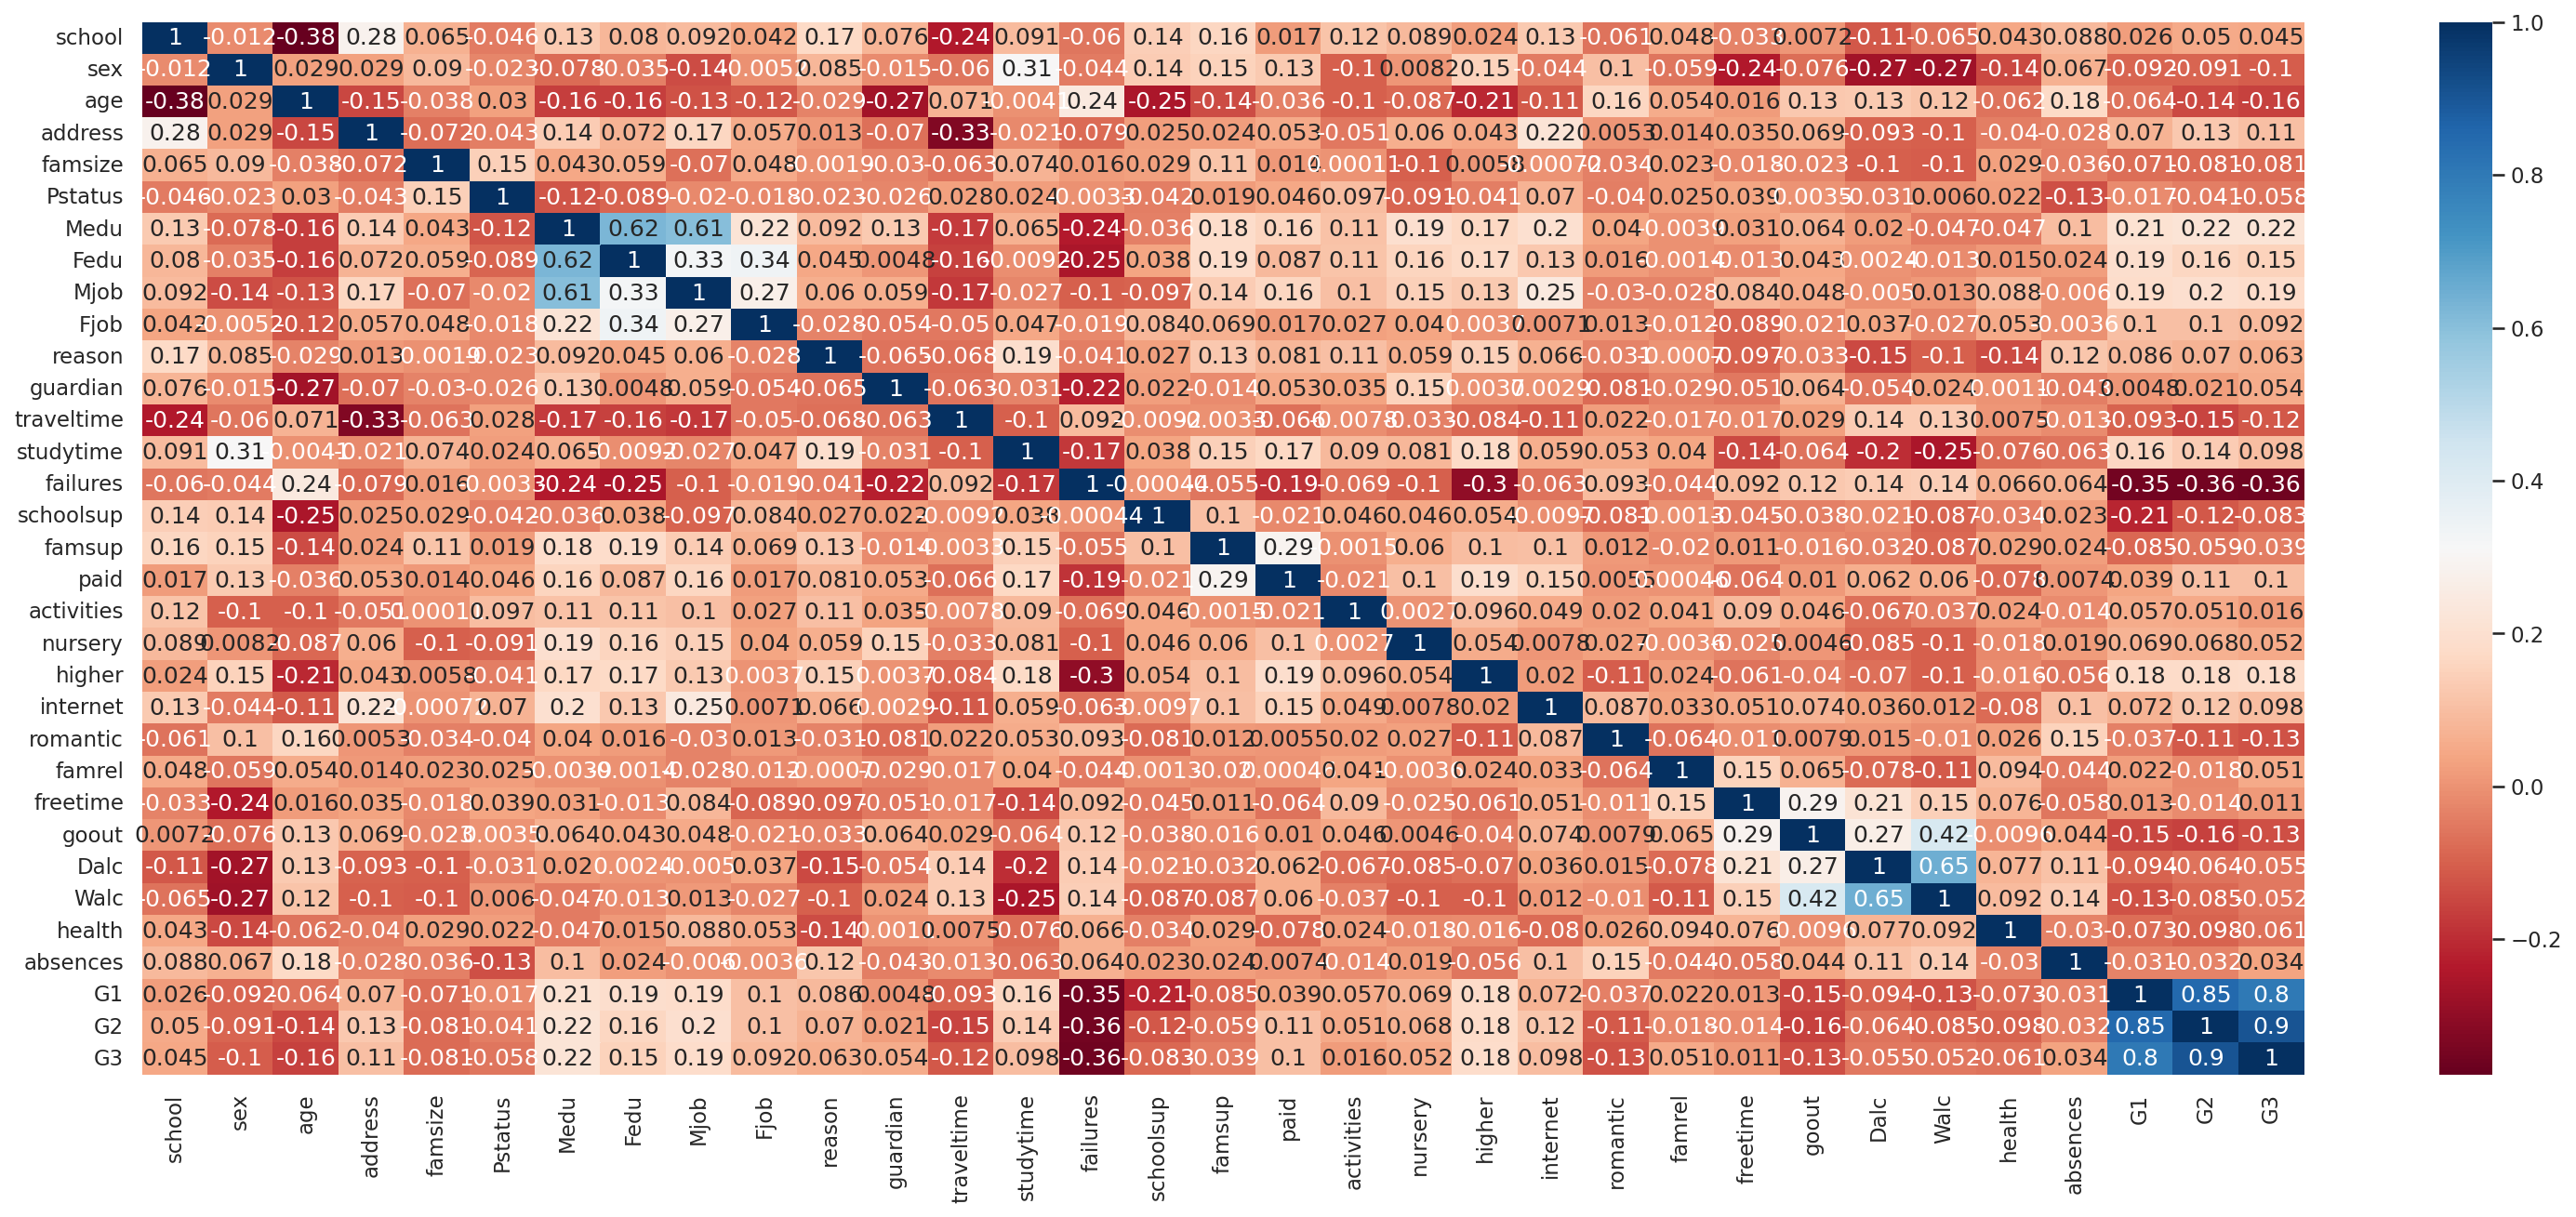

In [ ]:
plt.figure(figsize = (25,10), dpi = 150)
sns.heatmap(stud_df.corr(), annot = True, cmap = 'RdBu')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 3750x1500 with 0 Axes>

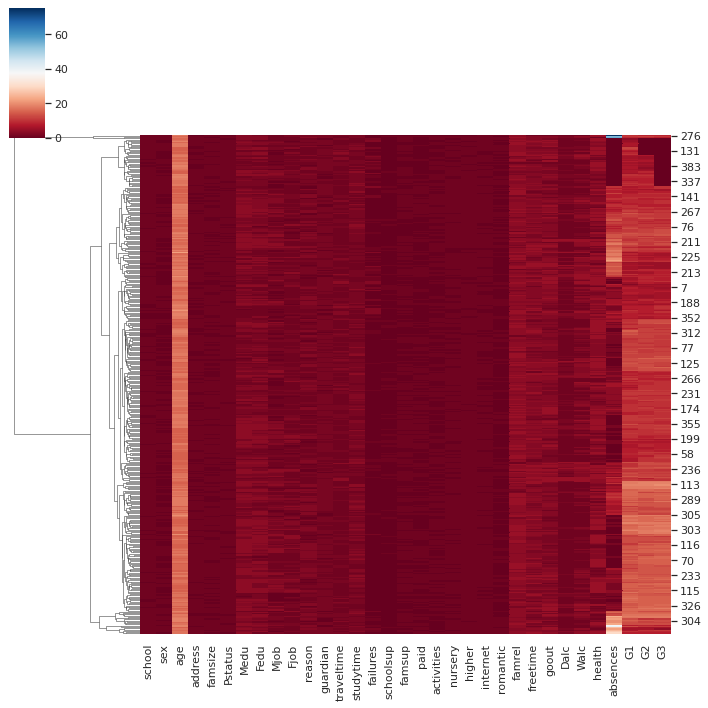

In [ ]:
plt.figure(figsize = (25,10), dpi = 150)
sns.clustermap(stud_df, cmap = 'RdBu', col_cluster = False)
plt.show()

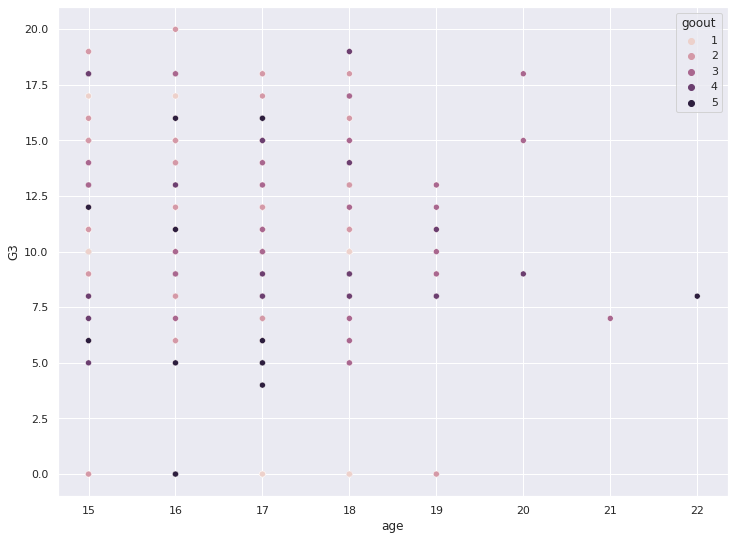

In [ ]:
plt.figure(figsize = (12,9))
sns.scatterplot(data = stud_df, x = 'age', y ='G3', hue = 'goout');

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
stud_seg = scaler.fit_transform(stud_df)

In [ ]:
stud_seg

array([[ 0.3630498 ,  0.94817639,  1.02304645, ..., -1.78246688,
        -1.25479105, -0.96493392],
       [ 0.3630498 ,  0.94817639,  0.23837976, ..., -1.78246688,
        -1.52097927, -0.96493392],
       [ 0.3630498 ,  0.94817639, -1.33095364, ..., -1.1791469 ,
        -0.72241461, -0.0907392 ],
       ...,
       [-2.75444305, -1.05465609,  3.37704655, ..., -0.27416693,
        -0.72241461, -0.74638524],
       [-2.75444305, -1.05465609,  1.02304645, ...,  0.02749306,
         0.34233827, -0.0907392 ],
       [-2.75444305, -1.05465609,  1.80771315, ..., -0.87748691,
        -0.45622639, -0.30928788]])

## Hierarchical Clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
hier_clust = linkage(stud_seg, method = 'ward')

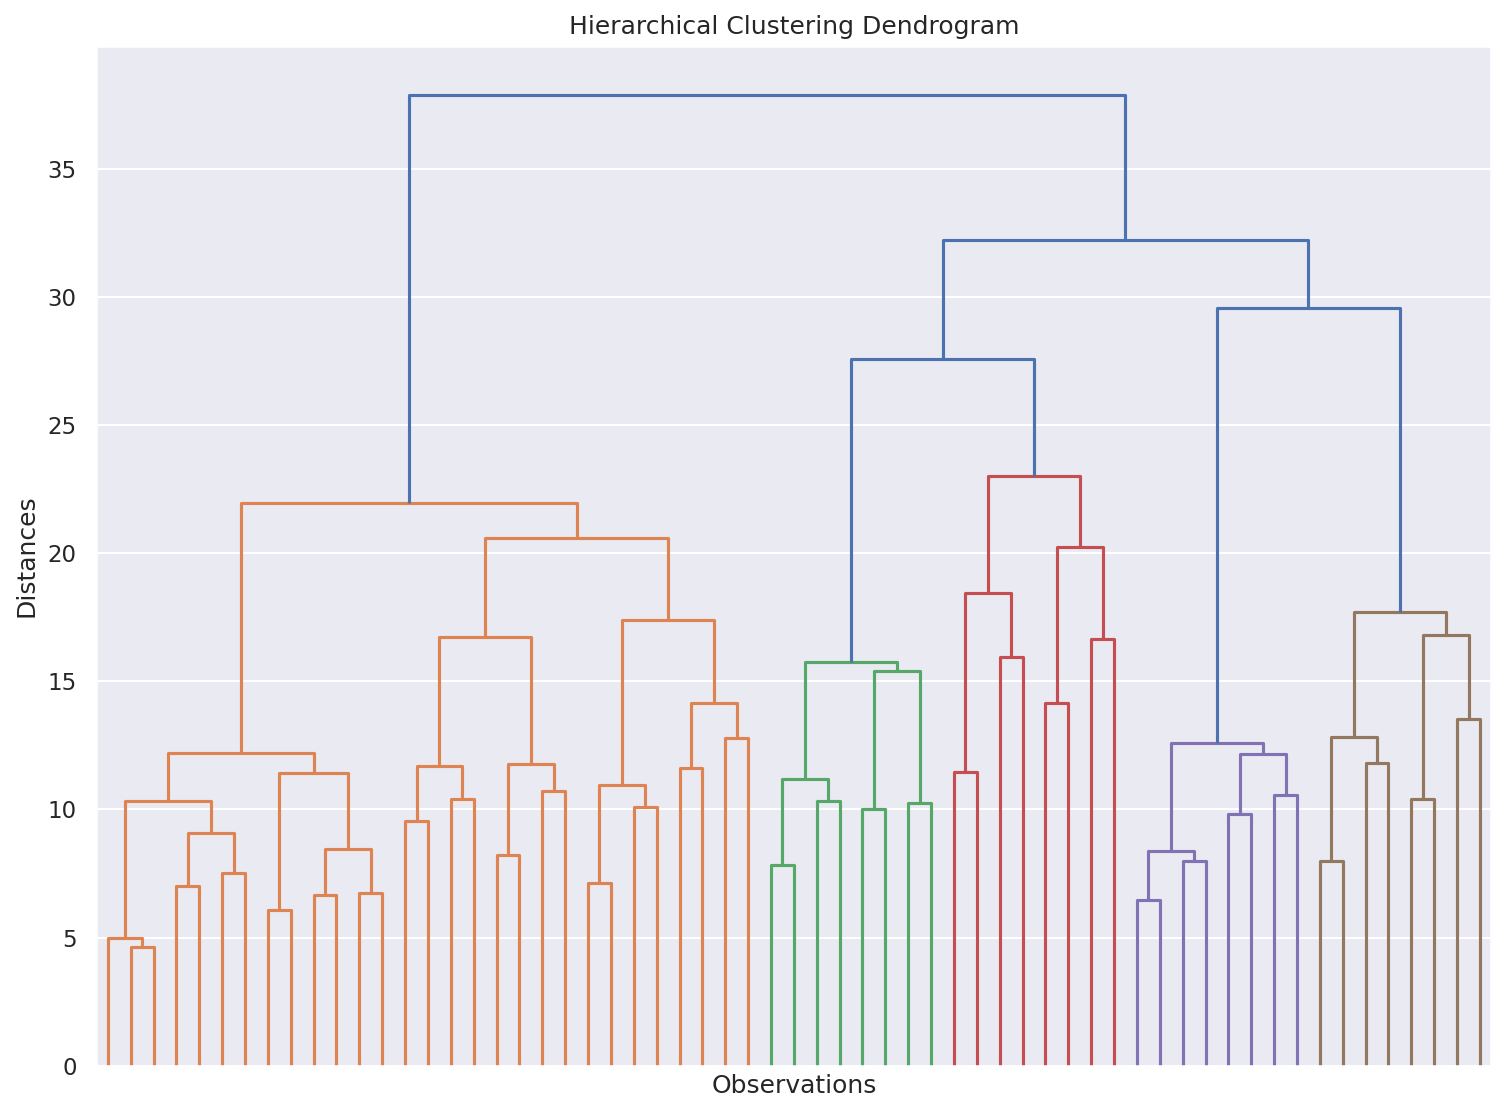

In [ ]:
plt.figure(figsize = (12,9), dpi = 150)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distances')
dendrogram(hier_clust, color_threshold = None, truncate_mode = 'level', p = 5, 
           no_labels = True, show_leaf_counts = False)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss = []
for n in range(1,11):
  kmeans = KMeans(n_clusters = n, init = 'k-means++', random_state = 42)
  kmeans.fit(stud_seg)
  wcss.append(kmeans.inertia_)

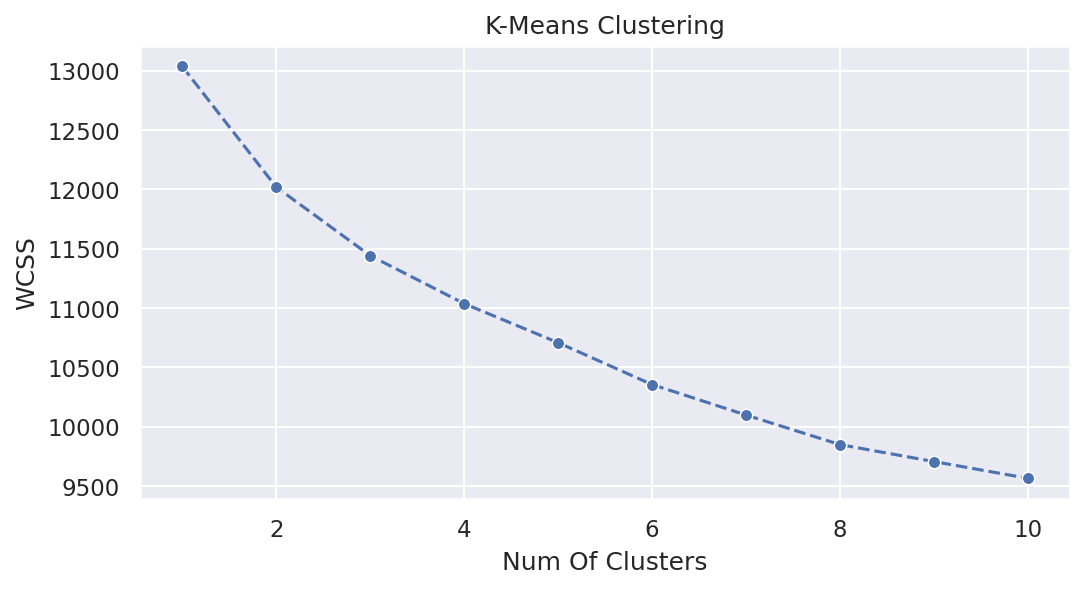

In [ ]:
plt.figure(figsize = (8,4), dpi = 150)
sns.lineplot(x = range(1,11), y = wcss, marker = 'o', linestyle = '--')
plt.xlabel('Num Of Clusters')
plt.ylabel('WCSS')
plt.title('K-Means Clustering');

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(stud_seg)

KMeans(n_clusters=4, random_state=42)

## Results

In [ ]:
stud_seg_df = stud_df.copy()

In [ ]:
stud_seg_df['Segment K-means'] = kmeans.labels_

In [ ]:
stud_seg_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Segment K-means
0,1,1,18,1,1,0,4,4,0,3,...,3,4,1,1,3,6,5,6,6,1
1,1,1,17,1,1,1,1,1,0,1,...,3,3,1,1,3,4,5,5,6,1
2,1,1,15,1,0,1,1,1,0,1,...,3,2,2,3,3,10,7,8,10,1
3,1,1,15,1,1,1,4,2,4,2,...,2,2,1,1,5,2,15,14,15,2
4,1,1,16,1,1,1,3,3,1,1,...,3,2,1,2,5,4,6,10,10,1


In [ ]:
stud_seg_analysis = stud_seg_df.groupby('Segment K-means').mean()

In [ ]:
stud_seg_analysis.T

Segment K-means,0,1,2,3
school,0.692308,0.887097,0.937063,0.907895
sex,0.211538,0.846774,0.468531,0.328947
age,17.711538,16.572581,16.384615,16.789474
address,0.576923,0.725806,0.888112,0.789474
famsize,0.653846,0.806452,0.692308,0.631579
Pstatus,0.923077,0.879032,0.909091,0.881579
Medu,1.942308,2.233871,3.146853,3.394737
Fedu,1.846154,2.153226,2.797203,3.065789
Mjob,1.211538,1.056452,2.055944,2.223684
Fjob,1.384615,1.322581,1.650350,1.657895


In [ ]:
stud_seg_analysis['N Obs'] = stud_seg_df[['Segment K-means', 'sex']].groupby('Segment K-means').count()

In [ ]:
stud_seg_analysis['Prop Obs'] = stud_seg_analysis['N Obs']/(stud_seg_analysis['N Obs'].sum())

In [ ]:
stud_seg_analysis

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,N Obs,Prop Obs
Segment K-means,,,,,,,,,,,,,,,,,,,,,
0,0.692308,0.211538,17.711538,0.576923,0.653846,0.923077,1.942308,1.846154,1.211538,1.384615,...,3.442308,1.769231,2.903846,3.846154,5.653846,7.865385,6.942308,5.923077,52,0.131646
1,0.887097,0.846774,16.572581,0.725806,0.806452,0.879032,2.233871,2.153226,1.056452,1.322581,...,2.822581,1.112903,1.774194,3.370968,4.959677,9.024194,8.677419,7.991935,124,0.313924
2,0.937063,0.468531,16.384615,0.888112,0.692308,0.909091,3.146853,2.797203,2.055944,1.650350,...,2.783217,1.132867,1.755245,3.419580,4.209790,13.888112,14.000000,14.230769,143,0.362025
3,0.907895,0.328947,16.789474,0.789474,0.631579,0.881579,3.394737,3.065789,2.223684,1.657895,...,3.960526,2.539474,3.723684,3.907895,9.789474,10.460526,10.434211,10.263158,76,0.192405


In [ ]:
stud_seg_analysis.rename({0 : 'Below Average', 1 : 'Average', 2 : 'Good', 3 : 'Above Average'})

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,N Obs,Prop Obs
Segment K-means,,,,,,,,,,,,,,,,,,,,,
Below Average,0.692308,0.211538,17.711538,0.576923,0.653846,0.923077,1.942308,1.846154,1.211538,1.384615,...,3.442308,1.769231,2.903846,3.846154,5.653846,7.865385,6.942308,5.923077,52,0.131646
Average,0.887097,0.846774,16.572581,0.725806,0.806452,0.879032,2.233871,2.153226,1.056452,1.322581,...,2.822581,1.112903,1.774194,3.370968,4.959677,9.024194,8.677419,7.991935,124,0.313924
Good,0.937063,0.468531,16.384615,0.888112,0.692308,0.909091,3.146853,2.797203,2.055944,1.650350,...,2.783217,1.132867,1.755245,3.419580,4.209790,13.888112,14.000000,14.230769,143,0.362025
Above Average,0.907895,0.328947,16.789474,0.789474,0.631579,0.881579,3.394737,3.065789,2.223684,1.657895,...,3.960526,2.539474,3.723684,3.907895,9.789474,10.460526,10.434211,10.263158,76,0.192405


In [ ]:
stud_seg_df['Segment K-means'] = stud_seg_df['Segment K-means'].map({0 : 'Below Average', 1 : 'Average', 2 : 'Good', 3 : 'Above Average'})

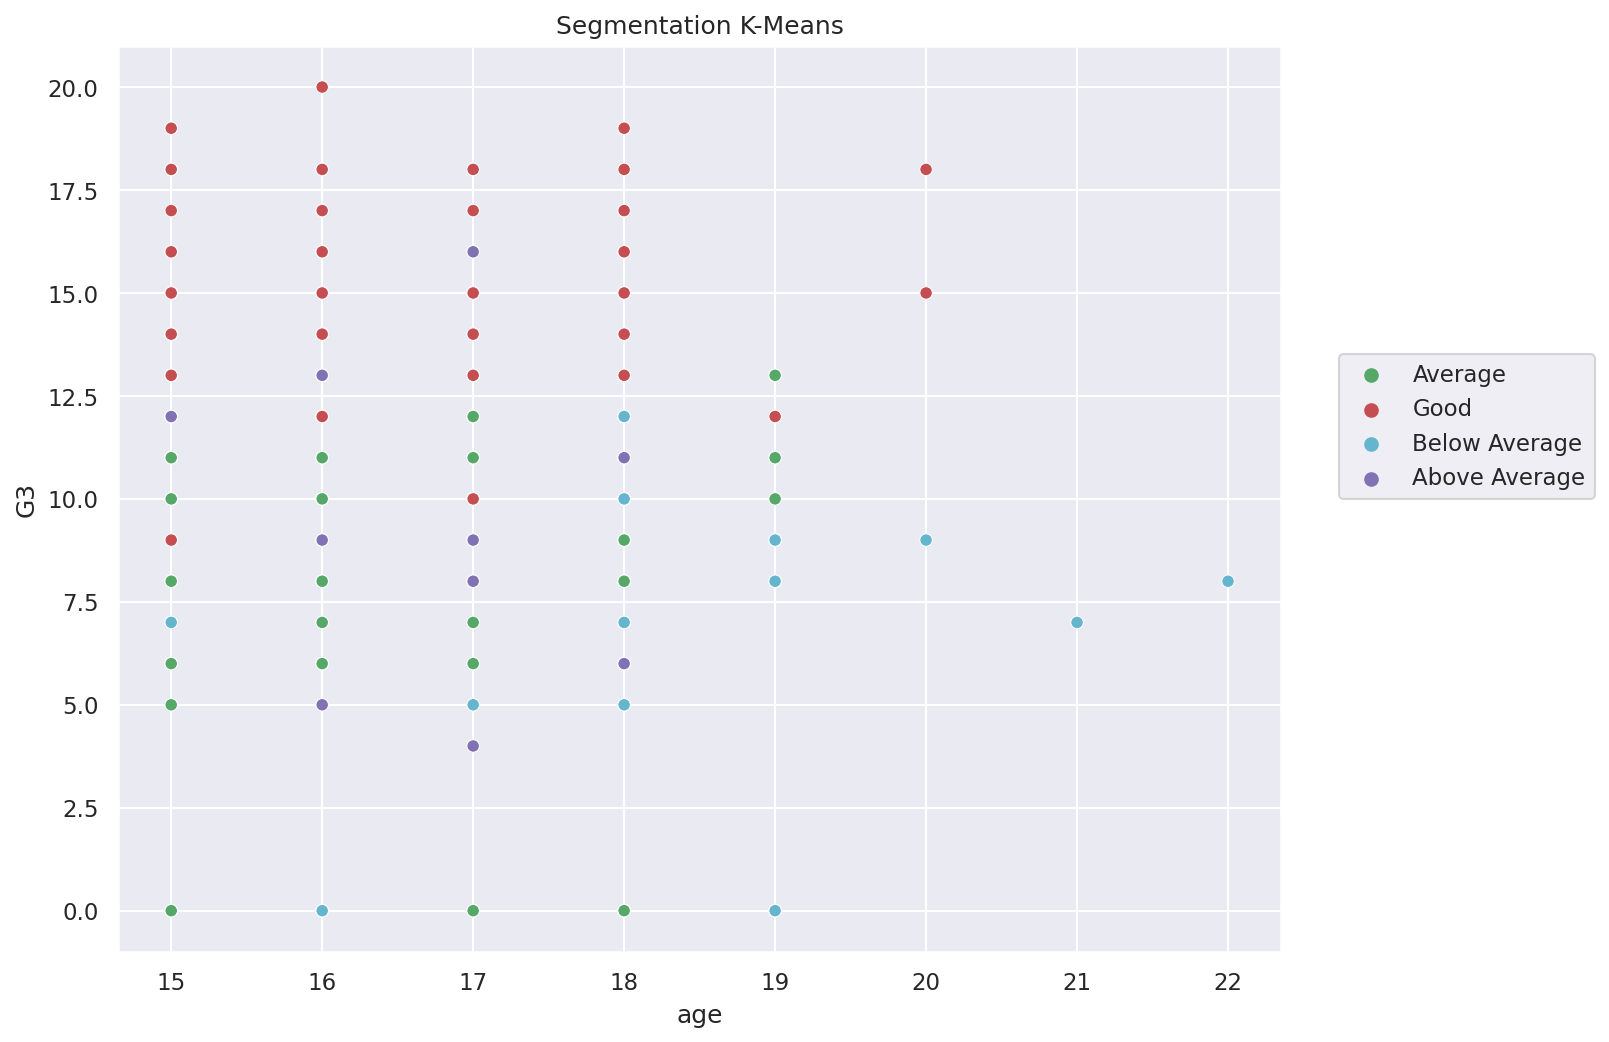

In [ ]:
plt.figure(figsize = (10,8), dpi = 150)
sns.scatterplot(data = stud_seg_df, x = 'age', y = 'G3', hue = 'Segment K-means', palette = ['g', 'r', 'c', 'm'])
plt.legend(loc = (1.05, 0.5))
plt.title('Segmentation K-Means')
plt.show()

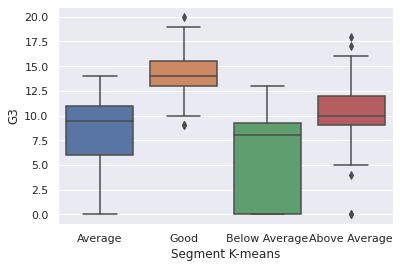

In [ ]:
sns.boxplot(data = stud_seg_df, x = 'Segment K-means', y = 'G3');

## PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()

In [ ]:
pca.fit(stud_seg)

PCA()

In [ ]:
pca.explained_variance_ratio_

array([0.12163215, 0.07699828, 0.06962555, 0.05123548, 0.04563564,
       0.04413971, 0.04322742, 0.03732435, 0.03673455, 0.03382775,
       0.03189463, 0.03094817, 0.03009157, 0.02938338, 0.02822639,
       0.0267108 , 0.02419028, 0.02321524, 0.02259324, 0.02190972,
       0.02055573, 0.01977075, 0.01813475, 0.01730993, 0.01711598,
       0.01542913, 0.01466955, 0.01332143, 0.01162702, 0.00898952,
       0.00637418, 0.00479758, 0.00236016])

In [ ]:
pca.components_

array([[-0.14126143, -0.01417936,  0.19719965, ..., -0.34931783,
        -0.37115928, -0.35872136],
       [-0.07667526, -0.37339615,  0.07805069, ...,  0.1112899 ,
         0.11889429,  0.13449496],
       [-0.24298052, -0.07037157,  0.16858295, ...,  0.36706174,
         0.35093992,  0.3396948 ],
       ...,
       [ 0.02529453,  0.04783059,  0.09558824, ..., -0.33034229,
         0.08418427,  0.22081639],
       [-0.07237345,  0.01539097, -0.07391317, ...,  0.71221291,
        -0.1900239 , -0.48148662],
       [-0.00823414, -0.00889831, -0.00836273, ..., -0.19907881,
         0.77491228, -0.59000472]])

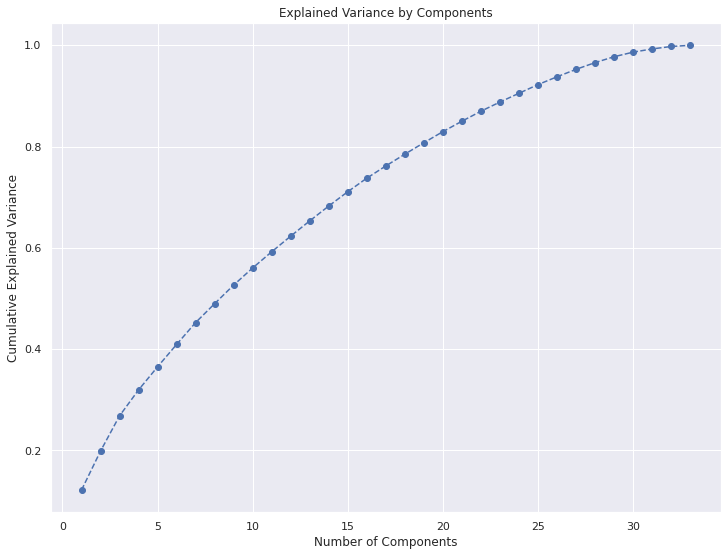

In [ ]:
plt.figure(figsize = (12,9))
plt.plot(range(1,34), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.show()

In [ ]:
pca15 = PCA(n_components = 15)

In [ ]:
pca15.fit(stud_seg)

PCA(n_components=15)

In [ ]:
pca15.components_

array([[-1.41261427e-01, -1.41793578e-02,  1.97199651e-01,
        -1.41909112e-01,  6.17461061e-03,  4.03458555e-02,
        -2.93899670e-01, -2.49231311e-01, -2.43008770e-01,
        -1.29679045e-01, -1.09805537e-01, -7.51388426e-02,
         1.67687730e-01, -1.42304108e-01,  2.83682738e-01,
         6.89002816e-03, -9.16762159e-02, -1.33385642e-01,
        -7.71316880e-02, -1.21706535e-01, -2.00484663e-01,
        -1.32121570e-01,  5.58012106e-02, -1.59535463e-02,
         4.38428919e-02,  9.50988242e-02,  1.29178020e-01,
         1.46282503e-01,  4.94257889e-02,  1.60911351e-02,
        -3.49317832e-01, -3.71159276e-01, -3.58721364e-01],
       [-7.66752647e-02, -3.73396145e-01,  7.80506950e-02,
         7.06542642e-03, -1.33934857e-01, -3.30699273e-02,
         1.77948578e-01,  1.37787881e-01,  2.16688202e-01,
         7.13873906e-02, -1.37684277e-01,  9.66932699e-03,
         4.70351781e-02, -2.66583609e-01,  5.14164292e-02,
        -1.62350072e-01, -9.80517840e-02, -9.60661322e-

In [ ]:
df_pca_comp = pd.DataFrame(data = pca15.components_, columns = stud_df.columns.values, 
                           index = ['Component1', 'Component2', 'Component3', 'Component4',
                                    'Component5','Component6','Component7','Component8',
                                    'Component9','Component10','Component11','Component12', 
                                    'Component13', 'Component14', 'Component15'])

In [ ]:
df_pca_comp.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
Component1,-0.141261,-0.014179,0.197200,-0.141909,0.006175,0.040346,-0.293900,-0.249231,-0.243009,-0.129679,...,-0.015954,0.043843,0.095099,0.129178,0.146283,0.049426,0.016091,-0.349318,-0.371159,-0.358721
Component2,-0.076675,-0.373396,0.078051,0.007065,-0.133935,-0.033070,0.177949,0.137788,0.216688,0.071387,...,-0.004695,0.272871,0.283201,0.417894,0.433380,0.101984,0.076511,0.111290,0.118894,0.134495
Component3,-0.242981,-0.070372,0.168583,-0.137917,-0.102376,0.031827,-0.285366,-0.257885,-0.231977,-0.150826,...,0.016559,-0.031668,-0.178509,-0.045290,-0.047019,-0.066122,-0.080700,0.367062,0.350940,0.339695
Component4,-0.240815,0.270488,0.436832,-0.095143,-0.045958,-0.092736,0.120543,0.077535,0.041458,0.032642,...,-0.139683,-0.163849,0.045029,0.103875,0.071727,-0.221260,0.336680,0.059501,0.023605,0.004422
Component5,-0.266835,0.052705,-0.147434,-0.468543,0.033965,0.024740,0.051781,0.126544,-0.041194,0.068562,...,-0.146416,-0.154031,-0.034845,0.172862,0.162578,0.030542,-0.144715,-0.046679,-0.041094,-0.017861


In [ ]:
scores_pca15 = pca15.transform(stud_seg)

## K-means with PCA

In [ ]:
wcss = []
for n in range(1,11):
  kmeans_pca15 = KMeans(n_clusters = n, init = 'k-means++', random_state = 42)
  kmeans_pca15.fit(scores_pca15)
  wcss.append(kmeans_pca15.inertia_)

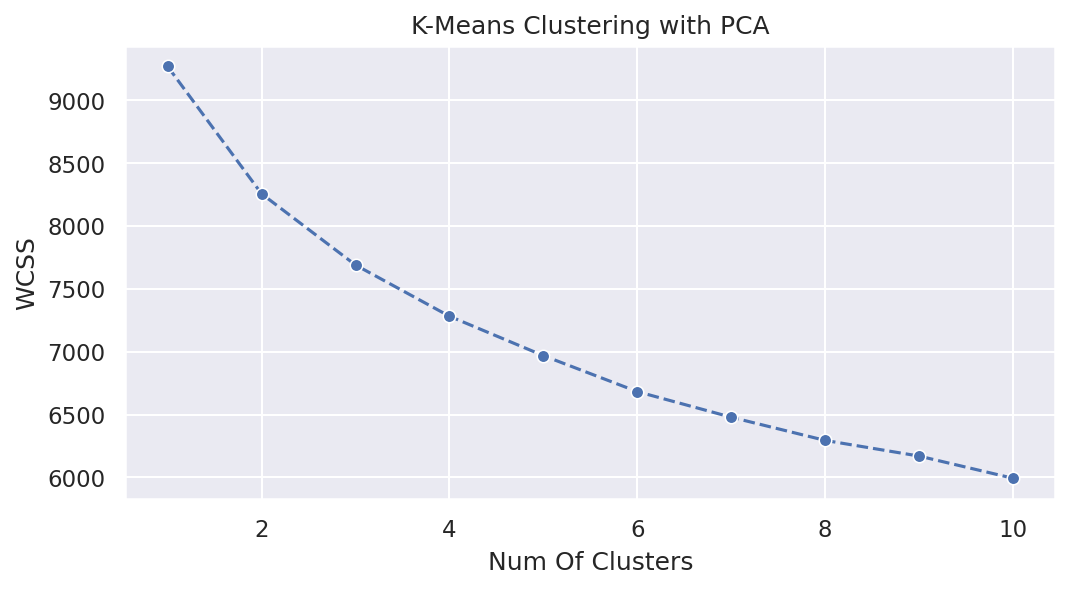

In [ ]:
plt.figure(figsize = (8,4), dpi = 150)
sns.lineplot(x = range(1,11), y = wcss, marker = 'o', linestyle = '--')
plt.xlabel('Num Of Clusters')
plt.ylabel('WCSS')
plt.title('K-Means Clustering with PCA');

In [ ]:
kmeans_pca15 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [ ]:
kmeans_pca15.fit(scores_pca15)

KMeans(n_clusters=4, random_state=42)

In [ ]:
stud_seg_df_pca = stud_df.copy()

In [ ]:
stud_seg_df_pca['Segment K-means'] = kmeans.labels_

In [ ]:
stud_seg_pca_analysis = stud_seg_df_pca.groupby('Segment K-means').mean()

In [ ]:
stud_seg_pca_analysis.T

Segment K-means,0,1,2,3
school,0.692308,0.887097,0.937063,0.907895
sex,0.211538,0.846774,0.468531,0.328947
age,17.711538,16.572581,16.384615,16.789474
address,0.576923,0.725806,0.888112,0.789474
famsize,0.653846,0.806452,0.692308,0.631579
Pstatus,0.923077,0.879032,0.909091,0.881579
Medu,1.942308,2.233871,3.146853,3.394737
Fedu,1.846154,2.153226,2.797203,3.065789
Mjob,1.211538,1.056452,2.055944,2.223684
Fjob,1.384615,1.322581,1.650350,1.657895


In [ ]:
stud_seg_pca_analysis['N Obs'] = stud_seg_df_pca[['Segment K-means', 'sex']].groupby('Segment K-means').count()
stud_seg_pca_analysis['Prop Obs'] = stud_seg_pca_analysis['N Obs']/(stud_seg_pca_analysis['N Obs'].sum())
stud_seg_pca_analysis.rename({0 : 'Below Average', 1 : 'Average', 2 : 'Good', 3 : 'Above Average'})
stud_seg_df_pca['Segment K-means'] = stud_seg_df_pca['Segment K-means'].map({0 : 'Below Average', 1 : 'Average', 2 : 'Good', 3 : 'Above Average'})

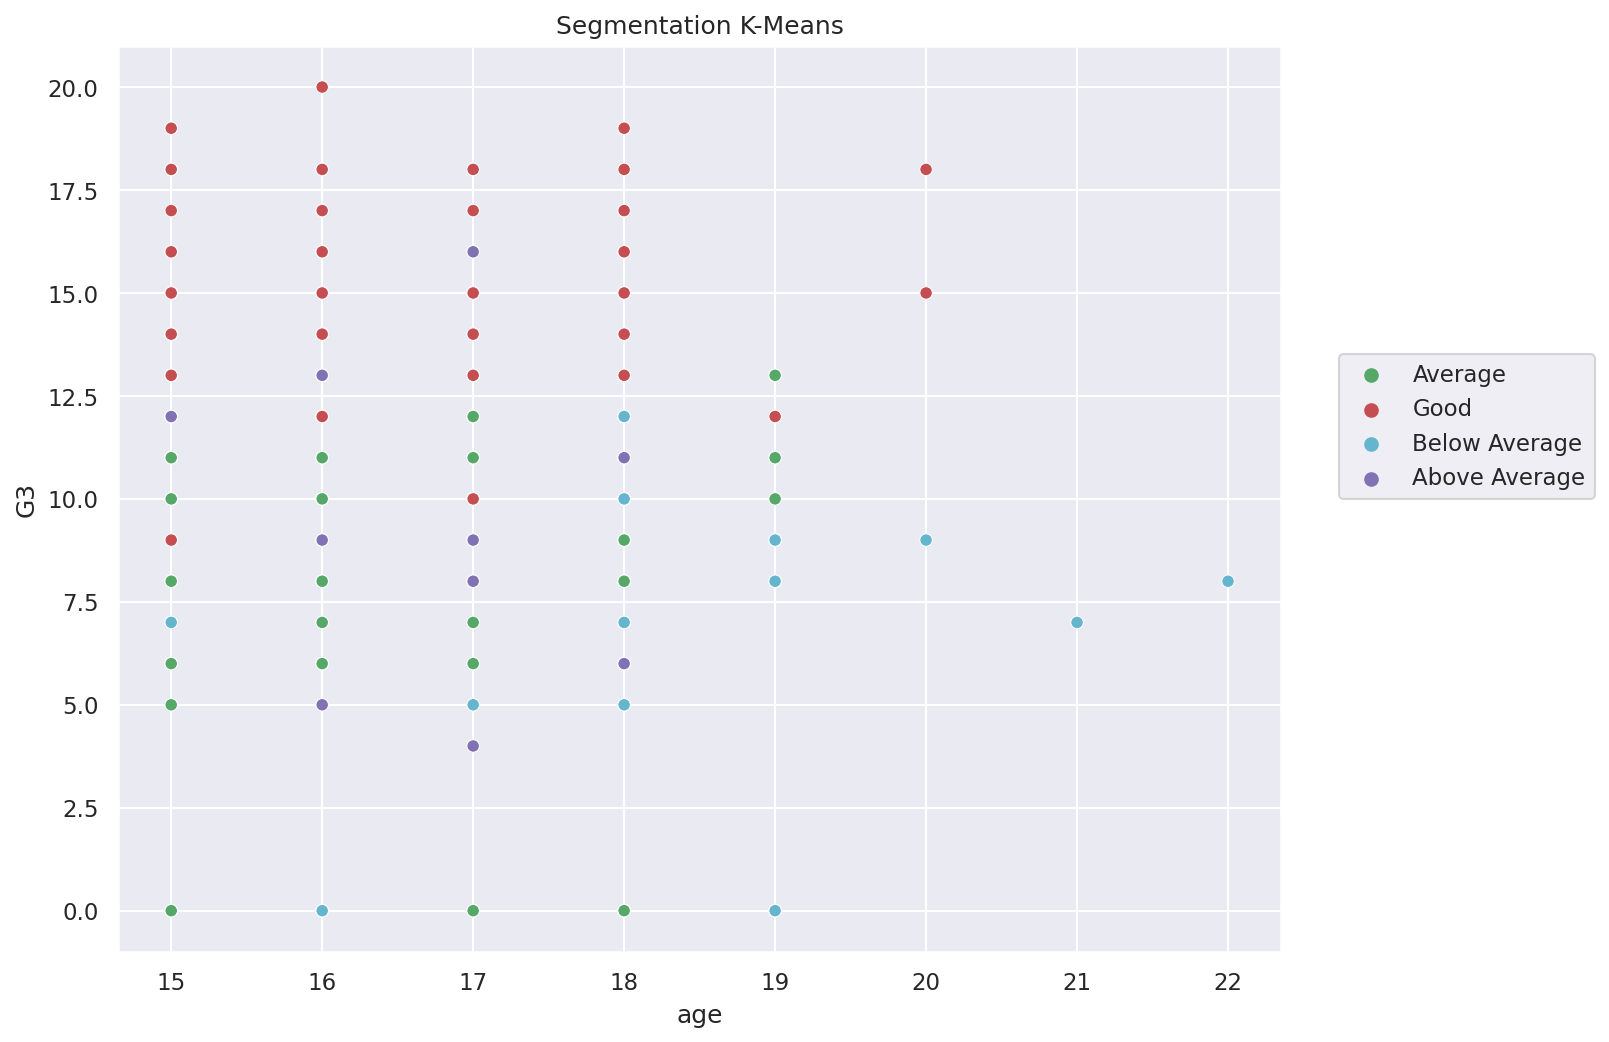

In [ ]:
plt.figure(figsize = (10,8), dpi = 150)
sns.scatterplot(data = stud_seg_df_pca, x = 'age', y = 'G3', hue = 'Segment K-means', palette = ['g', 'r', 'c', 'm'])
plt.legend(loc = (1.05, 0.5))
plt.title('Segmentation K-Means')
plt.show()

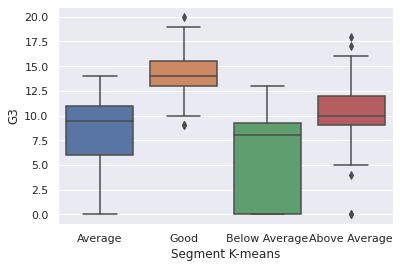

In [ ]:
sns.boxplot(data = stud_seg_df_pca, x = 'Segment K-means', y = 'G3');